In [1]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm
from collections import Counter
from scipy.stats import binomtest
from scipy.stats import spearmanr,pearsonr

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

d_abrev = {"LiangSteinNeuron":"FC exc. neur.", "FetalChondrocytes":"F chond.", "SertoliMale":"FG sertoli", "preGC_IIaFemale":"FG preGC IIa",\
          "NeuralFemale":"FG neur.", "FetalGonadImmuneFemale":"FG immune", "VIP":"AC VIP inh. neur.", "LiangSteinProgenitor":"FC prog.",\
          "AdultHeartVentricularCardiomyocyte":"AH cardiomyo.", "AdultLoopOfHenle":"AK loop of henle", "FetalBrainNeurGlioblast_CB_VZ":"FCB glioblast",\
         "AdultProximalTubule":"AK prox. tub.", "FetalLeydigMale":"FG leydig", "SST":"AC SST inh neur.", "KosoyRoussosControlMicroglia":"AC microglia",\
         "FetalBrainFloorPlate":"FB fl. plate", "FetalArterialECs":"FH endoth.", "ASCT":"AC astro.", "FetalBrainCOP":"FB COP",\
         "AMY":"AA neur.", "PVALB":"AC PVALB inh neur.", "ITL23":"AC L2-3 IT neur.", "FetalBrainNeurCB_GNP_IPC_1":"FB inter. prog.", "FetalBrainNeurDAergic":"FB DA neur.",\
          "OGC":"AC Oligo.", "D1Pu":"AP D1 inh neur.", "FetalBrainNeurSerotonergic":"FB 5-HT neur.", "FetalBrainNeurDRG_2":"FS DRG neur.",\
          "FetalHeartPericytes":"FH peri.", "FetalHeartEndocardium":"FH endocard.", "FetalHeartCardiacFibroblasts":"FH fibro.", "FetalBrainNeurPurkinje_6":"FCB Purk. inh neur.",\
          "AdultHeartSmoothMuscle":"AH smooth musc.", "FetalBrainRoofPlate":"FB ro. plate"}

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(0.12056448255285807, 0.05631432, [[9693, 12784], [836, 1255]], [[9693, 12784], [837, 1254]], <Figure size 1000x600 with 1 Axes>)
0.0030742428530980757


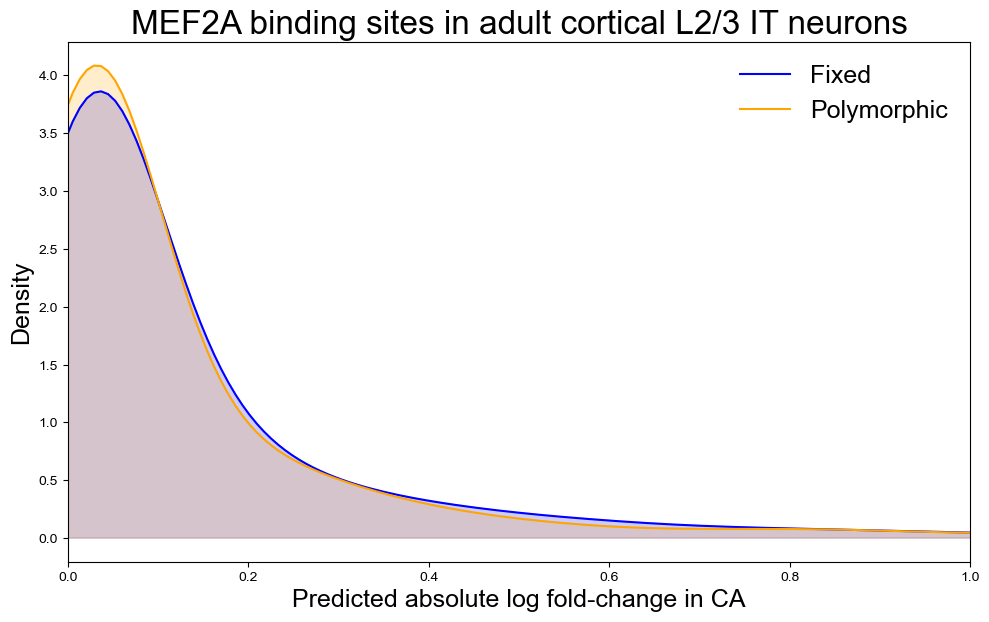

In [2]:
#Enrichment for Rxra gets even stronger at 550, 600
#Lack of shift in PhyloP is not consistent with this being due to differences in BGS
#Plot a TF by changing the ID

v2 = pd.read_csv("TF_Data/MA1643.1_NFIB_400_LiangSteinNeuron_Fixed.csv.gz")
vv2 = pd.read_csv("TF_Data/MA1643.1_NFIB_400_LiangSteinNeuron_Poly.csv.gz")
v2 = v2[(v2["1"] > 500) | ((v2["2"] > 500) & (v2["4"] > 500))]
vv2 = vv2[(vv2["1"] > 500) | ((vv2["2"] > 500) & (vv2["3"] > 500))]

be = list(pd.read_csv("BlacklistTE_Variants.txt")["Position"])
v2 = v2[~v2["Position"].isin(be)]
vv2 = vv2[~vv2["Position"].isin(be)]

#v2 = v2[v2["abs logfc"] > 0.25]
#vv2 = vv2[vv2["abs logfc"] > 0.25]

#v2 = v2[v2["SpecSup447"] > 250]
#vv2 = vv2[vv2["SpecSup447"] > 250]

vv2 = vv2[vv2["Human ref"] != vv2["Chimp ref"]]
cuttt = 0.6

z = list(vv2["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

vvv = prepare_alpha(v2, vv2, stat = "abs logfc")
#vvv["PhyloP"] = -vvv["PhyloP"]
alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 1], cutoff = cutoff, title = "MEF2A binding sites in adult cortical L2/3 IT neurons")
plt.xlabel("Predicted absolute log fold-change in CA")
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

In [9]:
v2[v2["NearestGene"].isin(["GRIN2A"])]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
49815,chr16:9702483,chr16:9702483,GRIN2A,480156,1.210,0.0,430,-0.015352,1035.94680,1024.98170,0.015352,chr16:9702483,511.0,437.0,437.0,Fixed,.,.
49833,chr16:9986165,chr16:9986165,GRIN2A,196474,1.597,0.0,191,0.901550,170.25012,318.03955,0.901550,chr16:9986165,394.0,504.0,504.0,Fixed,.,.
49834,chr16:9987249,chr16:9987249,GRIN2A,195390,0.863,0.0,387,0.781141,339.49660,583.42140,0.781141,chr16:9987249,453.0,506.0,506.0,Fixed,.,.
49835,chr16:9987267,chr16:9987267,GRIN2A,195372,0.269,0.0,311,-0.288311,338.13340,276.88397,0.288311,chr16:9987267,453.0,506.0,506.0,Fixed,.,.
49841,chr16:10067542,chr16:10067542,GRIN2A,115097,-2.065,0.0,388,0.413412,1085.22880,1445.34200,0.413412,chr16:10067542,427.0,546.0,545.0,Fixed,.,.


In [3]:
v2[v2["NearestGene"].isin(["VLDLR"])]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
141879,chr9:2346370,chr9:2346370,VLDLR,275412,0.860,0.000,422,-0.016487,351.84277,347.84482,0.016487,chr9:2346370,537.0,484.0,484.0,Fixed,.,.
141883,chr9:2356643,chr9:2356643,VLDLR,265139,-2.050,0.000,398,-0.315468,403.49670,324.24610,0.315468,chr9:2356643,535.0,493.0,492.0,Fixed,.,.
141900,chr9:2566108,chr9:2566108,VLDLR,55674,2.451,0.008,427,0.678558,520.59290,833.22925,0.678558,chr9:2566108,451.0,634.0,634.0,Fixed,.,.


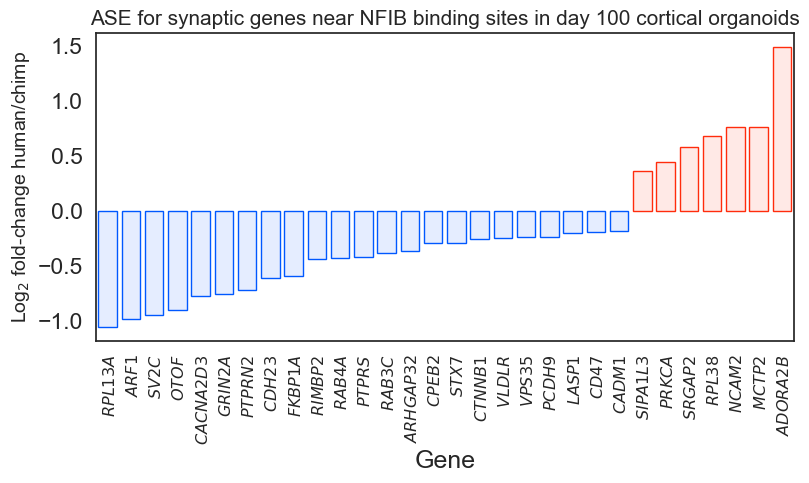

In [88]:
to_plot = v2ps_nd.sort_values("log2FoldChange")
out = []
for index, row in to_plot.iterrows():
    #out.append(["$_{" + index + "}$", row["log2FoldChange HumChp"], "Hybrid cortical organoid"])
    #out.append(["$_{" + index + "}$", row["log2FoldChange HumChp Adult"], "Adult MTG L2/3 IT"])
    if row["log2FoldChange"] < 0:
        x = "Down human"
    else:
        x = "Up human"
    out.append(["$_{" + index + "}$", row["log2FoldChange"], x])
to_plot = pd.DataFrame(out)
to_plot.columns = ["Gene", "Log$_{2}$ fold-change", "Direction"]
sns.set(font_scale = 1.5)
sns.set_style("white")
fig, ax = plt.subplots(figsize = (9, 4))
sns.set_style("white")
new_palette = {"Human":"#FF2C0C", "Chimp":"#0058FF"}
t_ax = sns.barplot(data = to_plot, x = "Gene", y = "Log$_{2}$ fold-change", hue = "Direction")


c = 0
for patch in t_ax.patches:
    if c < 23:
        patch.set_edgecolor(new_palette["Chimp"])
        patch.set_facecolor(new_palette["Chimp"] + "1A")
    else:
        patch.set_edgecolor(new_palette["Human"])
        patch.set_facecolor(new_palette["Human"] + "1A")
    c += 1
plt.title("ASE for synaptic genes near NFIB binding sites in day 100 cortical organoids", size = 15)
plt.xticks(rotation=90)
plt.ylabel("Log$_{2}$ fold-change human/chimp", size = 14)
plt.legend([], [], frameon = False)

0.0
1.0


C:\Users\astar\AppData\Local\Temp\ipykernel_12016\3526988169.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  t_ax = sns.barplot({"Upregulated\nin human":7, "Downregulated\nin human":23}, errorbar=None, linewidth=2.5, edgecolor=".5", facecolor='#F2C91140', gap = 0.1, palette = {"Upregulated\nin human":new_palette["Human"], "Downregulated\nin human":new_palette["Chimp"]})


Text(0.5, 1.0, 'Day 100 cortical organoids')

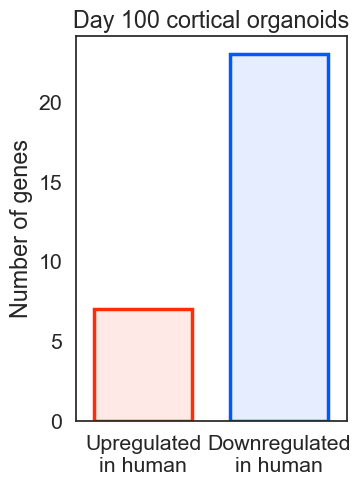

In [89]:
new_palette = {"Human":"#FF2C0C", "Chimp":"#0058FF"}

sns.set(font_scale = 1.4)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(3.5,5))
t_ax = sns.barplot({"Upregulated\nin human":7, "Downregulated\nin human":23}, errorbar=None, linewidth=2.5, edgecolor=".5", facecolor='#F2C91140', gap = 0.1, palette = {"Upregulated\nin human":new_palette["Human"], "Downregulated\nin human":new_palette["Chimp"]})
for patch in t_ax.patches:
    print(patch.get_x() + patch.get_width()/2)
c = 0
for patch in t_ax.patches:
    if c < 1:
        patch.set_edgecolor(new_palette["Human"])
        patch.set_facecolor(new_palette["Human"] + "1A")
    elif c == 1:
        patch.set_edgecolor(new_palette["Chimp"])
        patch.set_facecolor(new_palette["Chimp"] + "1A")
    c += 1
plt.ylabel("Number of genes")
plt.title("Day 100 cortical organoids")

In [111]:
v2ps_nd

,Position,Position.1,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,...,Sign1,Dif,Sign2,Sign,log2FoldChange,pvalue,padj,padj_mine,Sign3,Sign4
NearestGene,,,,,,,,,,,,,,,,,,,,,
SRGAP2,chr1:206457931,chr1:206457931,5457,0.680,0.002,435,-0.631897,958.18770,618.34470,0.631897,...,-1.0,190.0,1.0,-1.0,0.582417,6.698187e-06,6.245886e-05,8.917171e-05,1.0,-1.0
ARF1,chr1:228067149,chr1:228067149,15765,-0.288,0.000,284,0.271596,1137.90060,1373.60840,0.271596,...,1.0,-123.0,-1.0,-1.0,-0.984743,9.433149e-78,6.927647e-75,9.890513e-75,-1.0,-1.0
CDH23,chr10:71382396,chr10:71382396,14537,0.442,0.000,242,0.698839,972.53076,1578.61000,0.698839,...,1.0,-181.0,-1.0,-1.0,-0.608272,1.445436e-04,9.704641e-04,1.385519e-03,-1.0,-1.0
CADM1,chr11:115640640,chr11:115640640,136225,0.884,0.044,424,0.970405,499.34192,978.40564,0.970405,...,1.0,-201.0,-1.0,-1.0,-0.185869,4.704196e-04,2.733306e-03,3.902306e-03,-1.0,-1.0
ARHGAP32,chr11:129247086,chr11:129247086,54787,0.258,0.000,388,0.364030,480.81555,618.81744,0.364030,...,1.0,-19.0,-1.0,-1.0,-0.362679,1.237979e-03,6.374000e-03,9.100078e-03,-1.0,-1.0
PCDH9,chr13:66210876,chr13:66210876,1019463,-0.129,0.000,357,2.204351,557.39087,2568.83180,2.204351,...,1.0,-143.0,-1.0,-1.0,-0.234588,3.904036e-03,1.692564e-02,2.416452e-02,-1.0,-1.0
MCTP2,chr15:94082063,chr15:94082063,216203,-0.203,0.000,378,-0.917386,922.19684,488.27330,0.917386,...,-1.0,154.0,1.0,-1.0,0.760774,1.446766e-03,7.300097e-03,1.042226e-02,1.0,-1.0
GRIN2A,chr16:9987249,chr16:9987249,195390,0.863,0.000,387,0.781141,339.49660,583.42140,0.781141,...,1.0,-53.0,-1.0,-1.0,-0.754417,4.919681e-03,2.054246e-02,2.932821e-02,-1.0,-1.0
RPL38,chr17:73934099,chr17:73934099,269700,0.041,0.000,305,-0.257975,567.60870,474.66900,0.257975,...,-1.0,31.0,1.0,-1.0,0.677834,4.894029e-12,1.182680e-10,1.688497e-10,1.0,-1.0


In [113]:
#Across various cutoffs, we observe that when the sign of the motif difference is consistent with the sign of the logfc
#Is consistent with the sign of the RNA log fold-change, we observe a significant bias toward downregulation of the gene
#This holds across cutoffs for abs logfc, padj for RNA, and Top20th
cutoff_lsn = (531.89703 + 520.9438)/2

v2ps = v2p[v2p["abs logfc"] > 0.25]
x = pd.read_csv("Agoglia_Fraser_2021_DESeq2_HumChp_Hybrid_CS_D100_chpr.txt", sep = "\t").dropna()
x = x[x["padj"] < 0.05]
x = x[x["Gene"].isin(v2p["NearestGene"])]

v2ps["Sign1"] = np.sign(v2ps["logfc"])
v2ps["Dif"] = v2ps["1"] - v2ps["2"]
v2ps["Sign2"] = np.sign(v2ps["Dif"])
v2ps["Sign"] = v2ps["Sign1"]*v2ps["Sign2"]
v2ps = v2ps[v2ps["Sign"] < 0]

v2ps = v2ps[v2ps["NearestGene"].isin(x["Gene"])]
v2ps = v2ps.set_index("NearestGene").join(x.set_index("Gene"))
v2ps = v2ps[(v2ps["allele1_pred_counts"] > cutoff_lsn) | (v2ps["allele2_pred_counts"] > cutoff_lsn)]
v2ps["Sign3"] = np.sign(v2ps["log2FoldChange"])
v2ps["Sign4"] = v2ps["Sign3"]*v2ps["Sign1"]

#Testing whether there is more agreement in NFIB effect and RNA l2fc than expected by chance
agree = v2ps[v2ps["Sign4"] < 0].shape[0]
disagree = v2ps[v2ps["Sign4"] > 0].shape[0]
print(binomtest(agree, agree + disagree))

v2ps = v2ps[v2ps["Sign4"] < 0]
v2ps_nd = v2ps.drop_duplicates("pvalue")
down = v2ps_nd[v2ps_nd["log2FoldChange"] < 0].shape[0]
up = v2ps_nd[v2ps_nd["log2FoldChange"] > 0].shape[0]
print(binomtest(down, down + up))

#down = v2ps[v2ps["log2FoldChange"] < 0].shape[0]
#up = v2ps[v2ps["log2FoldChange"] > 0].shape[0]
#print(binomtest(down, down + up))

BinomTestResult(k=36, n=70, alternative='two-sided', statistic=0.5142857142857142, pvalue=0.9049745264594622)
BinomTestResult(k=23, n=30, alternative='two-sided', statistic=0.7666666666666667, pvalue=0.005222879350185395)


C:\Users\astar\AppData\Local\Temp\ipykernel_12016\3487769564.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2ps["Sign1"] = np.sign(v2ps["logfc"])
C:\Users\astar\AppData\Local\Temp\ipykernel_12016\3487769564.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2ps["Dif"] = v2ps["1"] - v2ps["2"]
C:\Users\astar\AppData\Local\Temp\ipykernel_12016\3487769564.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [56]:
from scipy.stats import spearmanr
print(spearmanr(np.abs(v2ps_nd["log2FoldChange"]), v2ps_nd["abs logfc"]))

SignificanceResult(statistic=-0.11740662438336857, pvalue=0.4478536707821814)


In [61]:
binomtest(30, 44)

BinomTestResult(k=17, n=26, alternative='two-sided', statistic=0.6538461538461539, pvalue=0.16863754391670227)

In [60]:
v2ps_nd[v2ps_nd["log2FoldChange"] > 0]

,Position,Position.1,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,...,Sign1,Dif,Sign2,Sign,log2FoldChange,pvalue,padj,padj_mine,Sign3,Sign4
NearestGene,,,,,,,,,,,,,,,,,,,,,
SRGAP2,chr1:206457931,chr1:206457931,5457,0.680,0.002,435,-0.631897,958.18770,618.34470,0.631897,...,-1.0,190.0,1.0,-1.0,0.582417,6.698187e-06,6.245886e-05,8.917171e-05,1.0,-1.0
EGLN1,chr1:231399614,chr1:231399614,22695,-0.846,0.000,191,-0.762311,422.84830,249.29066,0.762311,...,-1.0,122.0,1.0,-1.0,0.118887,8.953730e-03,3.390526e-02,4.840610e-02,1.0,-1.0
MCTP2,chr15:94082063,chr15:94082063,216203,-0.203,0.000,378,-0.917386,922.19684,488.27330,0.917386,...,-1.0,154.0,1.0,-1.0,0.760774,1.446766e-03,7.300097e-03,1.042226e-02,1.0,-1.0
RPL38,chr17:73934099,chr17:73934099,269700,0.041,0.000,305,-0.257975,567.60870,474.66900,0.257975,...,-1.0,31.0,1.0,-1.0,0.677834,4.894029e-12,1.182680e-10,1.688497e-10,1.0,-1.0
CBLN2,chr18:71875099,chr18:71875099,668842,-1.266,0.000,376,-0.355220,446.43805,349.00323,0.355220,...,-1.0,159.0,1.0,-1.0,0.552653,4.353361e-03,1.851592e-02,2.643494e-02,1.0,-1.0
NCAM2,chr21:22615877,chr21:22615877,1617520,0.336,0.000,362,-0.493682,987.39685,701.25920,0.493682,...,-1.0,196.0,1.0,-1.0,0.757972,1.944592e-07,2.481685e-06,3.543070e-06,1.0,-1.0
CNTN6,chr3:900428,chr3:900428,192541,1.424,0.002,164,-0.256612,383.20180,320.75964,0.256612,...,-1.0,183.0,1.0,-1.0,2.785849,7.390496e-08,1.013058e-06,1.446330e-06,1.0,-1.0
USP46,chr4:52603835,chr4:52603835,55418,-0.521,0.000,186,-0.298349,368.55475,299.70230,0.298349,...,-1.0,285.0,1.0,-1.0,0.162614,3.541815e-03,1.559235e-02,2.226100e-02,1.0,-1.0
SNX16,chr8:82140315,chr8:82140315,298121,-0.159,0.000,348,-0.554800,359.49854,244.72919,0.554800,...,-1.0,143.0,1.0,-1.0,0.504926,4.912478e-04,2.839652e-03,4.054135e-03,1.0,-1.0


In [3]:
o = open("Khaitovich_2012_Modules.txt")
out = []
for line in o:
    l = line.split()
    try:
        out.append([l[0], l[1], l[2], l[3]])
    except:
        pass
x = pd.DataFrame(out)
x.columns = ["Region", "Module", "Ensembl", "Gene"]

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["MAFMaxAcrossAncestry"] = z
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

(0.4490919197229345, 0.03849484, [[1619, 1340], [103, 156]], [[1619, 1340], [104, 155]], <Figure size 1000x600 with 1 Axes>)
3.546908936347903e-06


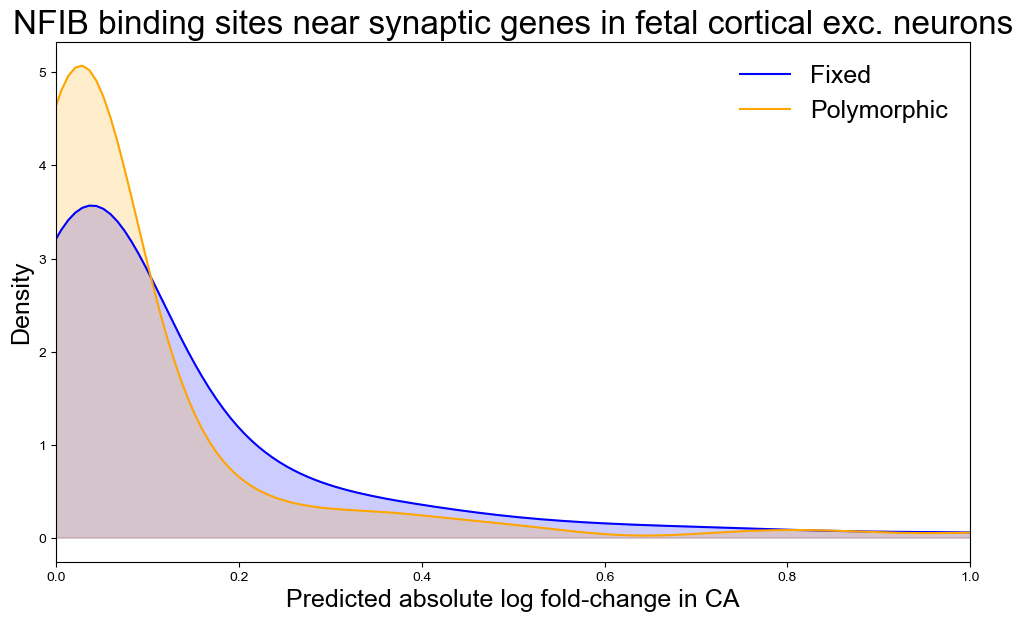

In [10]:
x = pd.read_csv("greatExportAll_MEF2A_AbsG0.1_GOBP.tsv", sep = "\t", skiprows=3)
keep = list(x.loc[0]["FgGeneNames"].split(",")) + list(x.loc[0]["BgGeneNames"].split(","))
syngo = pd.read_csv("../Cell_Type_Prop/Cell_Type_Prop/syngo_genes.csv")
keep = syngo["hgnc_symbol"]
#sfari = pd.read_csv("SFARI-Gene_genes_03-28-2024release_05-09-2024export.csv")
#keep = np.setdiff1d(sfari["gene-symbol"], syngo["hgnc_symbol"])
#keep = list(x["Gene"])

v2p = v2[v2["NearestGene"].isin(keep)]
vv2p = vv2[vv2["NearestGene"].isin(keep)]

#v2 = v2[v2["abs logfc"] > 0.25]
#vv2 = vv2[vv2["abs logfc"] > 0.25]

#v2 = v2[v2["SpecSup447"] > 250]
#vv2 = vv2[vv2["SpecSup447"] > 250]

vv2p = vv2p[vv2p["Human ref"] != vv2p["Chimp ref"]]
vvv = prepare_alpha(v2p, vv2p, stat = "abs logfc")
cuttt = 0.6

z = list(vv2p["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 1], cutoff = cutoff, title = "NFIB binding sites near synaptic genes in fetal cortical exc. neurons")
plt.xlabel("Predicted absolute log fold-change in CA")
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

In [4]:
real = np.mean(v2p["abs logfc"])
size = v2p.shape[0]

fakes = []
for i in range(10000):
    np.random.seed(i)
    fake = np.mean(v2.sample(n = size, replace = False)["abs logfc"])
    fakes.append(fake)
print(norm.sf((real - np.mean(fakes))/np.std(fakes)))



0.004203176005607739


Text(0.5, 1.0, 'MEF2A binding sites near synaptic assembly regulators')

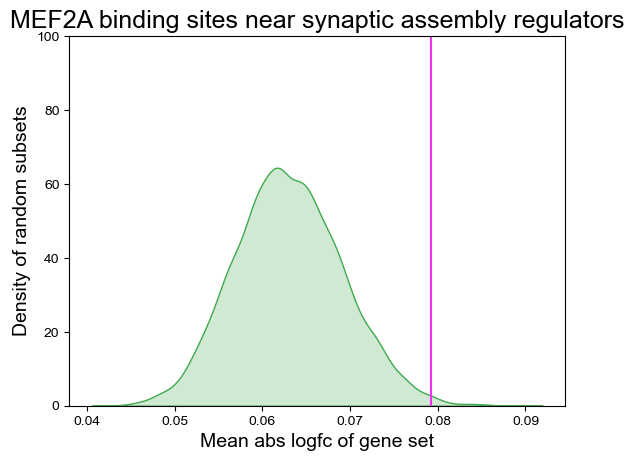

In [5]:
sns.kdeplot(fakes, fill = True, color = "#40A94D")
plt.vlines(x = real, ymin = 0, ymax = 100, color = "#F42FF5")
plt.ylim(0, 100)
plt.xlabel("Mean abs logfc of gene set", size = 14)
plt.ylabel("Density of random subsets", size = 14)
plt.title("MEF2A binding sites near synaptic assembly regulators", size = 18)

Text(0.5, 1.0, 'MEF2A binding sites near synaptic assembly regulators')

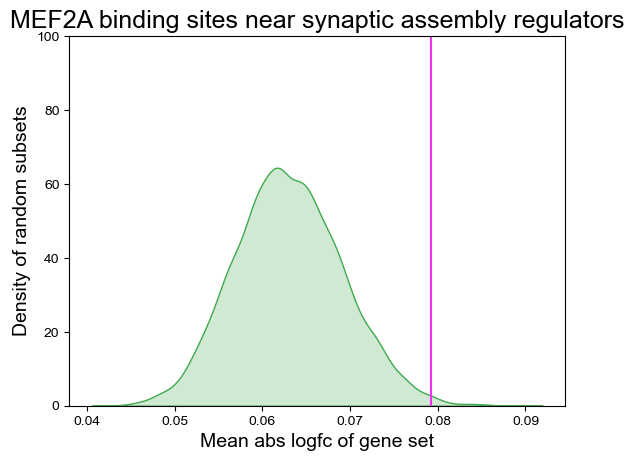

In [26]:
sns.kdeplot(fakes, fill = True, color = "#40A94D")
plt.vlines(x = real, ymin = 0, ymax = 100, color = "#F42FF5")
plt.ylim(0, 100)
plt.xlabel("Mean abs logfc of gene set", size = 14)
plt.ylabel("Density of random subsets", size = 14)
plt.title("MEF2A binding sites near synaptic assembly regulators", size = 18)

In [79]:
genes = list(np.unique(v2p[v2p["abs logfc"] > 0.25].sort_values("allele2_pred_counts")["NearestGene"]))
x = pd.read_csv("DESeq2_L2-3_IT_Human_Chimp.txt", sep = "\t")
x[x["Gene"].isin(genes)].sort_values("padj")

,Gene,log2FoldChange,pvalue,padj,padj_mine
18559,SLITRK1,-0.910375,0.000390,0.001983,0.002105
12155,UBE2V2,-0.749776,0.002274,0.008833,0.009377
5395,ROBO2,-0.838107,0.002956,0.011030,0.011709
4730,LRRN1,-0.641322,0.003578,0.012918,0.013713
9887,EPHA7,-0.922150,0.006868,0.022149,0.023512
4852,COLQ,0.451300,0.010155,0.030724,0.032615
11268,LRRN3,-0.454774,0.010347,0.031176,0.033094
18567,SLITRK5,-0.596523,0.012629,0.036656,0.038911
25809,FLRT3,-0.577846,0.021312,0.056311,0.059776
12963,PTPRD,0.351547,0.022767,0.059378,0.063031


In [86]:
v2p.sort_values("allele1_pred_counts").tail(70)

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,Dif
20629,chr13:87921975,chr13:87921975,SLITRK5,248658,-0.280,0.000,202,-0.204010,327.78670,284.56296,0.204010,chr13:87921975,543.0,357.0,357.0,Fixed,.,.,186.0
55137,chr4:92598414,chr4:92598414,GRID2,294432,1.846,0.000,429,-0.021425,332.72260,327.81787,0.021425,chr4:92598414,502.0,677.0,677.0,Fixed,.,.,-175.0
23633,chr14:84067658,chr14:84067658,FLRT2,1462470,-0.160,0.000,434,-0.046685,336.32440,325.61517,0.046685,chr14:84067658,525.0,465.0,465.0,Fixed,.,.,60.0
55141,chr4:92679499,chr4:92679499,GRID2,375517,-2.837,0.000,392,-0.029441,342.84012,335.91476,0.029441,chr4:92679499,535.0,435.0,435.0,Fixed,.,.,100.0
45726,chr3:15537280,chr3:15537280,COLQ,15600,0.946,1.000,373,0.449319,351.10310,479.39468,0.449319,chr3:15537280,371.0,534.0,534.0,Fixed,.,.,-163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55114,chr4:92106758,chr4:92106758,GRID2,197224,0.318,0.000,394,-0.040500,1052.77900,1023.63620,0.040500,chr4:92106758,524.0,371.0,308.0,Fixed,.,.,153.0
81149,chr9:29968045,chr9:29968045,LINGO2,1297761,-0.610,0.000,299,-0.137528,1091.49680,992.25275,0.137528,chr9:29968045,544.0,402.0,402.0,Fixed,.,.,142.0
81150,chr9:29968056,chr9:29968056,LINGO2,1297772,0.398,0.002,361,0.063400,1097.60420,1146.91430,0.063400,chr9:29968056,544.0,402.0,402.0,Fixed,.,.,142.0
178,chr1:9861382,chr1:9861382,CLSTN1,37429,0.527,0.005,435,-0.104443,1860.46120,1730.53420,0.104443,chr1:9861382,538.0,373.0,373.0,Fixed,.,.,165.0


In [83]:
v2p[np.abs(v2p["Dif"]) > 200]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,Dif
8420,chr10:65370853,chr10:65370853,LRRTM3,1555196,-1.950,0.000,335,-0.214936,193.166080,166.42883,0.214936,chr10:65370853,534.0,302.0,302.0,Fixed,.,.,232.0
20705,chr13:89396802,chr13:89396802,SLITRK5,1723485,-2.224,0.000,185,0.085074,154.406220,163.78522,0.085074,chr13:89396802,433.0,672.0,672.0,Fixed,.,.,-239.0
23733,chr14:86425483,chr14:86425483,FLRT2,895355,-1.225,0.000,358,-0.014169,429.863040,425.66180,0.014169,chr14:86425483,630.0,416.0,416.0,Fixed,.,.,214.0
32549,chr18:72121156,chr18:72121156,CBLN2,422785,-0.568,0.000,281,0.025556,355.833200,362.19263,0.025556,chr18:72121156,422.0,632.0,524.0,Fixed,.,.,-210.0
35747,chr2:51547836,chr2:51547836,NRXN1,515720,0.497,0.000,336,-0.316580,247.849180,199.01575,0.316580,chr2:51547836,539.0,264.0,373.0,Fixed,.,.,275.0
36747,chr2:80958741,chr2:80958741,LRRTM1,654013,-0.824,0.000,403,-0.006041,79.661040,79.32815,0.006041,chr2:80958741,563.0,314.0,388.0,Fixed,.,.,249.0
36759,chr2:81191130,chr2:81191130,LRRTM1,886402,0.956,0.000,251,-0.001639,136.599990,136.44489,0.001639,chr2:81191130,319.0,539.0,539.0,Fixed,.,.,-220.0
50773,chr3:165411131,chr3:165411131,SLITRK3,214751,-0.741,0.000,94,-0.015518,104.448784,103.33134,0.015518,chr3:165411131,403.0,680.0,518.0,Fixed,.,.,-277.0
62277,chr5:106611491,chr5:106611491,EFNA5,1059410,2.767,1.000,444,0.482710,186.105160,260.05707,0.482710,chr5:106611491,312.0,555.0,555.0,Fixed,.,.,-243.0
67547,chr6:93253481,chr6:93253481,EPHA7,166091,1.636,0.000,358,0.071745,117.227620,123.20474,0.071745,chr6:93253481,301.0,533.0,533.0,Fixed,.,.,-232.0


In [64]:
#Test whether that TF is enriched for up/down regulation in fixed compared to poly
v2p["Dif"] = v2p["1"] - v2p["2"]
vv2p["Dif"] = vv2p["1"] - vv2p["2"]

vv2p_ref = vv2p[vv2p["Human ref"] == vv2p["Chimp ref"]]
vv2p_alt = vv2p[vv2p["Human alt"] == vv2p["Chimp ref"]]
vv2p_ref["fixed logfc"] = -vv2p_ref["logfc"].astype(float)
vv2p_alt["fixed logfc"] = vv2p_alt["logfc"].astype(float)
vv2p = pd.concat([vv2p_ref, vv2p_alt])

up = v2p[v2p["logfc"] > 0.1].shape[0]
down = v2p[v2p["logfc"] < -0.1].shape[0]
up_poly = vv2p[vv2p["fixed logfc"] > 0.1].shape[0]
down_poly = vv2p[vv2p["fixed logfc"] < -0.1].shape[0]
#print(binomtest(up, up + down, p = up_poly/(up_poly + down_poly)), up_poly/(up_poly + down_poly))
print(fisher_exact([[up, down], [up_poly, down_poly]]))

SignificanceResult(statistic=1.0, pvalue=1.0)


C:\Users\astar\AppData\Local\Temp\ipykernel_15260\1364337309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2p["Dif"] = v2p["1"] - v2p["2"]


SignificanceResult(statistic=0.7945263754963131, pvalue=0.2858430505823887)
SignificanceResult(statistic=-0.31153940339448516, pvalue=0.0)


<Axes: xlabel='Dif', ylabel='logfc'>

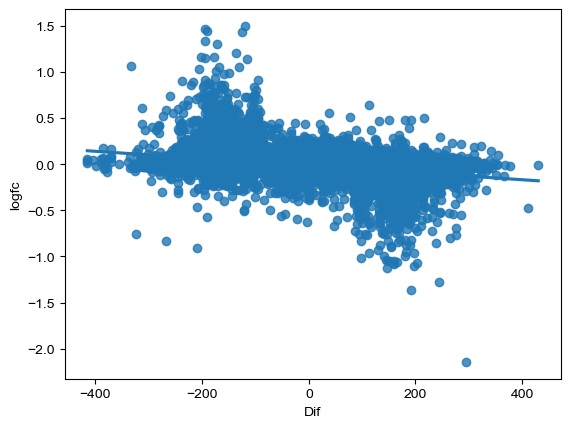

In [67]:
#Test whether that TF is enriched for increased/decreased binding in fixed compared to poly
#Also correlate/plot predicted difference in binding by motif matching with logfc in accessibility

v2["Dif"] = v2["1"] - v2["2"]
vv2["Dif"] = vv2["1"] - vv2["2"]

up = v2[v2["Dif"] > 200].shape[0]
down = v2[v2["Dif"] < -200].shape[0]
up_poly = vv2[vv2["Dif"] > 200].shape[0]
down_poly = vv2[vv2["Dif"] < -200].shape[0]
#print(binomtest(up, up + down, p = up_poly/(up_poly + down_poly)), up_poly/(up_poly + down_poly))
print(fisher_exact([[up, down], [up_poly, down_poly]]))
from scipy.stats import spearmanr
print(spearmanr(v2["Dif"], v2["logfc"]))
sns.regplot(x=v2["Dif"], y=v2["logfc"])

In [28]:
v2[v2["NearestGene"].isin(["GRIN2A", "GRIN2B"])]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
28954,chr12:13625076,chr12:13625076,GRIN2B,355344,-0.652,0.000,400,0.015590,507.09302,512.60254,0.015590,chr12:13625076,584.0,594.0,594.0,Fixed,.,.
28963,chr12:13849610,chr12:13849610,GRIN2B,130810,-3.539,0.000,440,0.650489,2046.41530,3212.25900,0.650489,chr12:13849610,506.0,514.0,514.0,Fixed,.,.
28967,chr12:13933272,chr12:13933272,GRIN2B,47148,0.092,0.000,408,0.025415,1087.86510,1107.19890,0.025415,chr12:13933272,471.0,518.0,518.0,Fixed,.,.
28972,chr12:14102206,chr12:14102206,GRIN2B,121786,0.026,0.002,184,-0.086255,616.69040,580.90076,0.086255,chr12:14102206,674.0,674.0,674.0,Fixed,.,.
28973,chr12:14128219,chr12:14128219,GRIN2B,147799,-2.836,0.000,238,-0.246052,440.90490,371.77120,0.246052,chr12:14128219,503.0,517.0,515.0,Fixed,.,.
49815,chr16:9702483,chr16:9702483,GRIN2A,480156,1.210,0.000,430,-0.015352,1035.94680,1024.98170,0.015352,chr16:9702483,511.0,437.0,437.0,Fixed,.,.
49833,chr16:9986165,chr16:9986165,GRIN2A,196474,1.597,0.000,191,0.901550,170.25012,318.03955,0.901550,chr16:9986165,394.0,504.0,504.0,Fixed,.,.
49834,chr16:9987249,chr16:9987249,GRIN2A,195390,0.863,0.000,387,0.781141,339.49660,583.42140,0.781141,chr16:9987249,453.0,506.0,506.0,Fixed,.,.
49835,chr16:9987267,chr16:9987267,GRIN2A,195372,0.269,0.000,311,-0.288311,338.13340,276.88397,0.288311,chr16:9987267,453.0,506.0,506.0,Fixed,.,.
49841,chr16:10067542,chr16:10067542,GRIN2A,115097,-2.065,0.000,388,0.413412,1085.22880,1445.34200,0.413412,chr16:10067542,427.0,546.0,545.0,Fixed,.,.


(0.1643940554619273, 0.08, [[3317, 1818], [279, 183]], [[3317, 1818], [279, 183]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=1.1967363403006968, pvalue=0.07606188451368977)


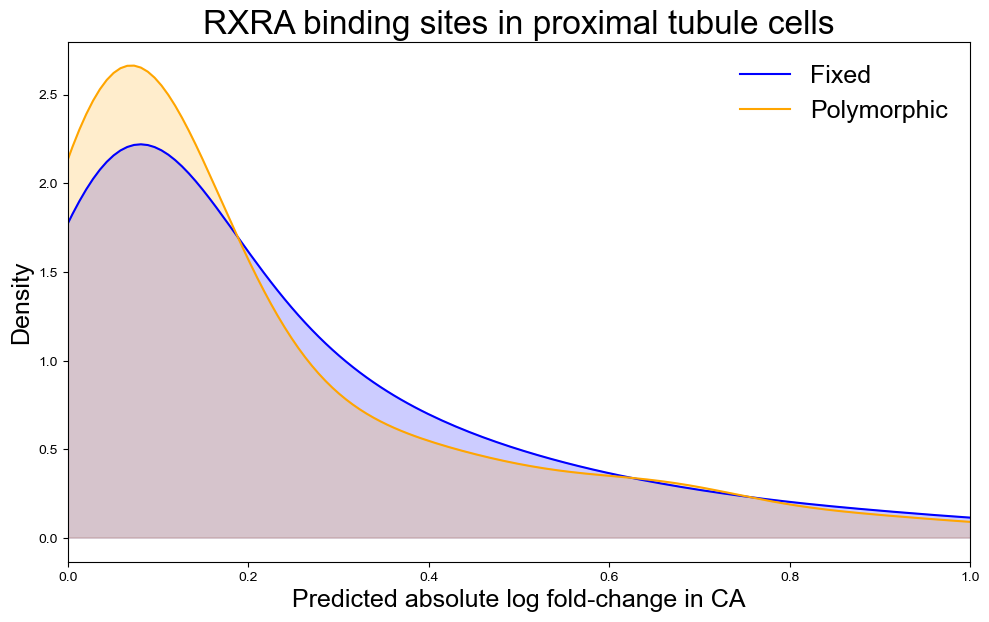

In [22]:
#Enrichment for Rxra gets even stronger at 550, 600
#Lack of shift in PhyloP is not consistent with this being due to differences in BGS
#Plot a TF by changing the ID

v2 = pd.read_csv("TF_Data/MA0512.2_Rxra_400_AdultProximalTubule_Fixed.csv.gz")
vv2 = pd.read_csv("TF_Data/MA0512.2_Rxra_400_AdultProximalTubule_Poly.csv.gz")
v2 = v2[(v2["1"] > 500) | ((v2["2"] > 500) & (v2["4"] > 500))]
vv2 = vv2[(vv2["1"] > 500) | ((vv2["2"] > 500) & (vv2["3"] > 500))]

be = list(pd.read_csv("BlacklistTE_Variants.txt")["Position"])
v2 = v2[~v2["Position"].isin(be)]
vv2 = vv2[~vv2["Position"].isin(be)]


#v2 = v2[v2["abs logfc"] > 0.25]
#vv2 = vv2[vv2["abs logfc"] > 0.25]

#v2 = v2[v2["SpecSup447"] > 250]
#vv2 = vv2[vv2["SpecSup447"] > 250]

vv2 = vv2[vv2["Human ref"] != vv2["Chimp ref"]]
vvv = prepare_alpha(v2, vv2, stat = "abs logfc")
#vvv["PhyloP"] = -vvv["PhyloP"]
alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 1], cutoff = 0.08, title = "RXRA binding sites in proximal tubule cells")
plt.xlabel("Predicted absolute log fold-change in CA")
print(alpha)
print(fisher_exact(alpha[-2]))

In [11]:
v2[v2["NearestGene"].isin(["PAX2"])]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
5725,chr10:100700719,chr10:100700719,PAX2,44951,0.276,0.0,381,0.349378,268.8838,342.56104,0.349378,chr10:100700719,441.0,514.0,514.0,Fixed,.,.
5726,chr10:100731367,chr10:100731367,PAX2,14303,1.379,0.0,415,-1.012433,8650.7130,4288.24170,1.012433,chr10:100731367,562.0,426.0,426.0,Fixed,.,.


In [24]:
x = pd.read_csv("ASE_SNPs.FILTER.SPLIT_SPECIES.bed", sep = "\t", header = None)
x["Position"] = x[0] + ":" + x[2].astype(str)
x = x[[3, "Position"]]
x.columns = ["Mut", "Position"]
x = x.set_index("Position")



In [28]:
v2.index = v2["Position"]
v2 = v2.join(x)
v2_ws = v2[v2["Mut"].isin(["C|A", "G|A", "C|T", "G|T"])]
v2_sw = v2[v2["Mut"].isin(["A|C", "A|G", "T|C", "T|G"])]
v2_ww_ss = v2[~v2["Position"].isin(list(v2_ws["Position"]) + list(v2_sw["Position"]))]

ValueError: columns overlap but no suffix specified: Index(['Mut'], dtype='object')

In [31]:
v2_ws = v2[v2["Mut"].isin(["C|A", "G|A", "C|T", "G|T"])]
v2_sw = v2[v2["Mut"].isin(["A|C", "A|G", "T|C", "T|G"])]
v2_ww_ss = v2[~v2["Position"].isin(list(v2_ws["Position"]) + list(v2_sw["Position"]))]

In [32]:
spearmanr(v2["Dif"], v2["logfc"])

SignificanceResult(statistic=-0.6198027796257259, pvalue=0.0)

In [33]:
spearmanr(v2_ws["Dif"], v2_ws["logfc"])

SignificanceResult(statistic=-0.5884010114604199, pvalue=8.374507840335074e-164)

In [34]:
spearmanr(v2_sw["Dif"], v2_sw["logfc"])

SignificanceResult(statistic=-0.5979007364390327, pvalue=3.875462104733608e-250)

In [35]:
spearmanr(v2_ww_ss["Dif"], v2_ww_ss["logfc"])

SignificanceResult(statistic=-0.6810636312979979, pvalue=4.0084875162140594e-110)

<Axes: xlabel='Dif', ylabel='logfc'>

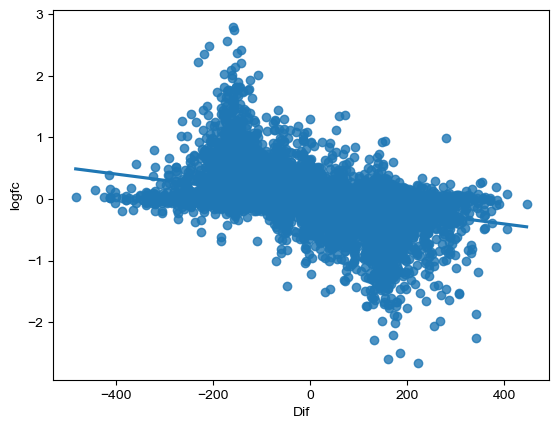

In [10]:
sns.regplot(x = v2["Dif"], y = v2["logfc"])

In [17]:
#Test whether that TF is enriched for up/down regulation in fixed compared to poly
v2["Dif"] = v2["1"] - v2["2"]
vv2["Dif"] = vv2["1"] - vv2["2"]

vv2_ref = vv2[vv2["Human ref"] == vv2["Chimp ref"]]
vv2_alt = vv2[vv2["Human alt"] == vv2["Chimp ref"]]
vv2_ref["fixed logfc"] = -vv2_ref["logfc"].astype(float)
vv2_alt["fixed logfc"] = vv2_alt["logfc"].astype(float)
vv2 = pd.concat([vv2_ref, vv2_alt])

up = v2[v2["logfc"] > 0.1].shape[0]
down = v2[v2["logfc"] < -0.1].shape[0]
up_poly = vv2[vv2["fixed logfc"] > 0.1].shape[0]
down_poly = vv2[vv2["fixed logfc"] < -0.1].shape[0]
#print(binomtest(up, up + down, p = up_poly/(up_poly + down_poly)), up_poly/(up_poly + down_poly))
print(fisher_exact([[up, down], [up_poly, down_poly]]))

SignificanceResult(statistic=1.3699463327370305, pvalue=0.1424079917716594)


SignificanceResult(statistic=0.8457531049429023, pvalue=0.3056045285866733)
SignificanceResult(statistic=-0.23072752381606174, pvalue=4.012698935643231e-91)


<Axes: xlabel='Dif', ylabel='logfc'>

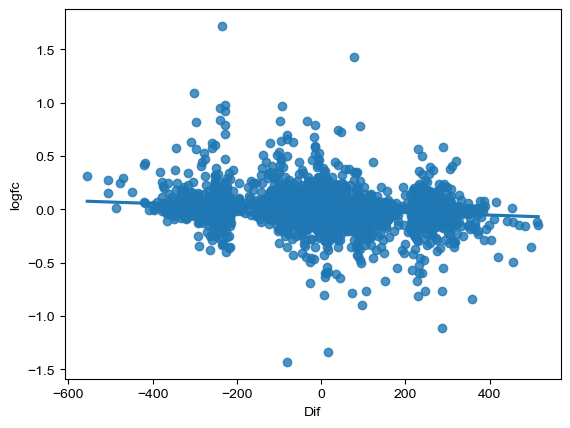

In [18]:
#Test whether that TF is enriched for increased/decreased binding in fixed compared to poly
#Also correlate/plot predicted difference in binding by motif matching with logfc in accessibility

v2["Dif"] = v2["1"] - v2["2"]
vv2["Dif"] = vv2["1"] - vv2["2"]

up = v2[v2["Dif"] > 200].shape[0]
down = v2[v2["Dif"] < -200].shape[0]
up_poly = vv2[vv2["Dif"] > 200].shape[0]
down_poly = vv2[vv2["Dif"] < -200].shape[0]
#print(binomtest(up, up + down, p = up_poly/(up_poly + down_poly)), up_poly/(up_poly + down_poly))
print(fisher_exact([[up, down], [up_poly, down_poly]]))
from scipy.stats import spearmanr
print(spearmanr(v2["Dif"], v2["logfc"]))
sns.regplot(x=v2["Dif"], y=v2["logfc"])

In [19]:
### Create inputs to GREAT to test whether sites with large abs logfc are enriched near certain types of genes

#Change 0.1 to 0.25 for NFIB and other TFs with large effects on CA
v2_fore = v2[v2["abs logfc"] > 0.1]

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]

#Need to change 
v2_fore.to_csv("ESR1_AbsG0.1_Fixed_preGC_FilterNewTEs.bed", sep = "\t", header = None, index = None)

v2["Chrom"] = [x.split(":")[0] for x in v2["Position"]]
v2["Pos1"] = [int(x.split(":")[1]) for x in v2["Position"]]
v2["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2["Position"]]

#Set to 0.05 for MEF2A
#Change 0.025 to 0.1 for NFIB and other TFs with large effects on CA
v2_back = pd.concat([v2_fore, v2[v2["abs logfc"] < 0.025]])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("ESR1_AbsG0.1_Fixed_Background_New_preGC_FilterNewTEs.bed", sep = "\t", header = None, index = None)

#Not used, making the background polymorphisms (which are much rarer) does not work well
#vv2["Chrom"] = [x.split(":")[0] for x in vv2["Position"]]
#vv2["Pos1"] = [int(x.split(":")[1]) for x in vv2["Position"]]
#vv2["Pos2"] = [int(x.split(":")[1]) + 1 for x in vv2["Position"]]
#v2_back = pd.concat([v2_fore, vv2])
#v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
#v2_back.to_csv("NR1D1_AbsG0.1_Fixed_Background_Poly_ITL23_FilterNewTEs.bed", sep = "\t", header = None, index = None)

C:\Users\astar\AppData\Local\Temp\ipykernel_27800\1217471670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_27800\1217471670.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_27800\1217471670.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [ ]:
#Testing whether all NFIB targets or synaptic targets are enriched for up/downregulation in Rachel's data

#Reading in the NFIB data
#Can change to ASCT and get similar values
v2 = pd.read_csv("TF_Data/MA1643.1_NFIB_400_LiangSteinNeuron_Fixed.csv.gz")
vv2 = pd.read_csv("TF_Data/MA1643.1_NFIB_400_LiangSteinNeuron_Poly.csv.gz")
v2 = v2[v2["SpecSup447"] > 100]
vv2 = vv2[vv2["SpecSup447"] > 100]
v2 = v2[(v2["1"] > 500) | ((v2["2"] > 500) & (v2["4"] > 500))]
vv2 = vv2[(vv2["1"] > 500) | ((vv2["2"] > 500) & (vv2["3"] > 500))]

be = list(pd.read_csv("BlacklistTE_Variants.txt")["Position"])
v2 = v2[~v2["Position"].isin(be)]
vv2 = vv2[~vv2["Position"].isin(be)]

vv2 = vv2[vv2["Human ref"] != vv2["Chimp ref"]]
vvv = prepare_alpha(v2, vv2, stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 1], cutoff = 0.3)
print(alpha)
print(fisher_exact(alpha[-2]))

#Get just the synaptic genes
v2_syn = v2[v2["NearestGene"].isin(syngo)]
v2_syn_big = v2_syn[v2_syn["abs logfc"] > 0.25]
v2_syn_small = v2_syn[v2_syn["abs logfc"] < 0.1]

#Get the DE genes from Rachel's paper
#Can change to humr and get similar values
#Can change to D100 and get similar values
ra = pd.read_csv("../Prime_DB_Expression/Agoglia_Fraser_2021/STAR/Hybrid_chpr/Agoglia_Fraser_2021_DESeq2_HumChp_Hybrid_CS_D150_chpr.txt", sep = "\t")

#Can change to 0.01 and get similar values
ra = ra[ra["padj"] < 0.05]

#Get synaptic genes with big effect sizes
v2_sbb = v2_syn_big[v2_syn_big["NearestGene"].isin(ra["Gene"])]

#Get all genes with big effect sizes
v2_big = v2[v2["abs logfc"] > 0.25]
v2_small = v2[v2["abs logfc"] < 0.1]
v2_bb = v2_big[v2_big["NearestGene"].isin(ra["Gene"])]
v2_sb = v2_small[v2_small["NearestGene"].isin(ra["Gene"])]

raaa = ra[ra["Gene"].isin(v2_bb["NearestGene"])]
down = raaa[raaa["log2FoldChange"] < 0].shape[0]
up = raaa[raaa["log2FoldChange"] > 0].shape[0]
down_back = ra[(ra["log2FoldChange"] < 0) & (ra["Gene"].isin(v2_sb["NearestGene"]))].shape[0]
up_back = ra[(ra["log2FoldChange"] > 0) & (ra["Gene"].isin(v2_sb["NearestGene"]))].shape[0]
#down_back = ra[(ra["log2FoldChange"] < 0)].shape[0]
#up_back = ra[(ra["log2FoldChange"] > 0)].shape[0]

#We don't find evidence for selection on NFIB targets when properly specifying the null model
print(binomtest(down, down + up, p = down_back/(down_back + up_back)))

#We don't find evidence for selection on synaptic NFIB targets when properly specifying the null model
raa = ra[ra["Gene"].isin(v2_sbb["NearestGene"])]
down = raa[raa["log2FoldChange"] < 0].shape[0]
up = raa[raa["log2FoldChange"] > 0].shape[0]
down_back = ra[(ra["log2FoldChange"] < 0) & (ra["Gene"].isin(v2_syn_small["NearestGene"]))].shape[0]
up_back = ra[(ra["log2FoldChange"] > 0) & (ra["Gene"].isin(v2_syn_small["NearestGene"]))].shape[0]

print(binomtest(down, down + up, p = down_back/(down_back + up_back)))
print(fisher_exact([[down, up], [down_back, up_back]]))

In [ ]:
#For NFIB, looking for synaptic downregulated genes with matching CA
#CDH13 was the best example

v2_sbb_down = v2_sbb[v2_sbb["NearestGene"].isin(raa[raa["log2FoldChange"] < 0]["Gene"])]
v2_sbb_down = v2_sbb_down[np.sign(v2_sbb_down["logfc"]) != np.sign(v2_sbb_down["Dif"])]
v2_sbb_down = v2_sbb_down[v2_sbb_down["logfc"] > 0]
v2_sbb_down = v2_sbb_down[(v2_sbb_down["allele1_pred_counts"] > 1000) | (v2_sbb_down["allele2_pred_counts"] > 1000)]
v2_sbb_down

In [ ]:
### COPY OF CELL ABOVE BUT RECORDING WHAT WE DID FOR NFIB ###

#v2 = v2[(v2["allele1_pred_counts"] > 350) | (v2["allele1_pred_counts"] > 350)]
v2_fore = v2[v2["abs logfc"] > 0.25]

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]
v2_fore.to_csv("NFIB_AbsG0.25_Fixed_LSN_FilterNewTEs.bed", sep = "\t", header = None, index = None)

v2["Chrom"] = [x.split(":")[0] for x in v2["Position"]]
v2["Pos1"] = [int(x.split(":")[1]) for x in v2["Position"]]
v2["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2["Position"]]

#Set to 0.05 for MEF2A
v2_back = pd.concat([v2_fore, v2[v2["abs logfc"] < 0.1]])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("NFIB_AbsG0.25_Fixed_Background_New_LSN_FilterNewTEs.bed", sep = "\t", header = None, index = None)

vv2["Chrom"] = [x.split(":")[0] for x in vv2["Position"]]
vv2["Pos1"] = [int(x.split(":")[1]) for x in vv2["Position"]]
vv2["Pos2"] = [int(x.split(":")[1]) + 1 for x in vv2["Position"]]
v2_back = pd.concat([v2_fore, vv2])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("NFIB_AbsG0.25_Fixed_Background_Poly_LSN_FilterNewTEs.bed", sep = "\t", header = None, index = None)

In [30]:
v = pd.read_csv("Fixed_LiangSteinNeuron.txt.gz", sep = "\t")
vv = pd.read_csv("Poly_MAF0.25_LiangSteinNeuron.txt.gz", sep = "\t")


try:
    vv = add_unfold(vv)
    vv_ref = vv[vv["Human ref"] == vv["Chimp ref"]]
    vv_alt = vv[vv["Human alt"] == vv["Chimp ref"]]
    vv_ref["fixed logfc"] = -vv_ref["logfc"].astype(float)
    vv_alt["fixed logfc"] = vv_alt["logfc"].astype(float)
    vv = pd.concat([vv_ref, vv_alt])
except:
    pass

te_blacklist = pd.read_csv("BlacklistTE_Variants.txt", sep = "\t")
    
v = v[~v["Position"].isin(te_blacklist["Position"])]
vv = vv[~vv["Position"].isin(te_blacklist["Position"])]



C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_alt["UnfoldedMAF"] = 1-yvalls_alt["MAFMaxAcrossAncestry"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_ref["UnfoldedMAF"] = yvalls_ref["MAFMaxAcrossAncestry"]
C:\Users\astar\AppData\Local\Temp\ipykernel_15260\2969482670.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [58]:
v["Chrom"] = [x.split(":")[0] for x in v["Position"]]
v["Pos"] = [int(x.split(":")[1]) for x in v["Position"]]

v_grin = v[(v["Chrom"].isin(["chr16"])) & v["Pos"].isin(list(range(9987249-2000, 9987249+2000)))]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos
3243022,chr16:9985304,chr16:9985304,GRIN2A,197335,0.441,0.004,232,0.029097,162.79834,166.11505,0.029097,chr16,9985304
3243023,chr16:9985624,chr16:9985624,GRIN2A,197015,-0.393,0.001,187,-0.000138,179.32877,179.31158,0.000138,chr16,9985624
3243024,chr16:9985740,chr16:9985740,GRIN2A,196899,1.484,0.004,148,-0.039557,186.32565,181.28621,0.039557,chr16,9985740
3243025,chr16:9985828,chr16:9985828,GRIN2A,196811,1.485,0.021,187,-0.104097,179.43692,166.94574,0.104097,chr16,9985828
3243026,chr16:9985914,chr16:9985914,GRIN2A,196725,0.026,0.001,104,0.044524,181.85944,187.55939,0.044524,chr16,9985914
3243027,chr16:9985935,chr16:9985935,GRIN2A,196704,0.493,0.143,104,-0.001754,181.54001,181.31938,0.001754,chr16,9985935
3243028,chr16:9985979,chr16:9985979,GRIN2A,196660,-0.263,0.002,102,-0.013232,178.48935,176.85980,0.013232,chr16,9985979
3243029,chr16:9986011,chr16:9986011,GRIN2A,196628,-0.035,0.025,116,0.034448,177.94005,182.23999,0.034448,chr16,9986011
3243030,chr16:9986165,chr16:9986165,GRIN2A,196474,1.597,0.000,191,0.901550,170.25012,318.03955,0.901550,chr16,9986165
3243031,chr16:9986809,chr16:9986809,GRIN2A,195830,-0.424,0.000,342,0.002391,253.96542,254.38675,0.002391,chr16,9986809


In [59]:
v_grin = v[(v["Chrom"].isin(["chr16"])) & v["Pos"].isin(list(range(9987249-2000, 9987249+2000)))]

In [62]:
v[v["NearestGene"].isin(["GRIN2A"])].sort_values("abs logfc").tail(50)

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos
3244265,chr16:10258967,chr16:10258967,GRIN2A,76328,-0.857,0.000,103,0.266118,300.69952,361.61145,0.266118,chr16,10258967
3244071,chr16:10221372,chr16:10221372,GRIN2A,38733,-0.282,0.000,301,0.267741,317.16406,381.84058,0.267741,chr16,10221372
3242034,chr16:9745202,chr16:9745202,GRIN2A,437437,-0.027,0.001,424,0.270774,271.95764,328.10455,0.270774,chr16,9745202
3241683,chr16:9661632,chr16:9661632,GRIN2A,521007,-0.086,0.000,424,0.272860,1213.80700,1466.52280,0.272860,chr16,9661632
3244092,chr16:10226822,chr16:10226822,GRIN2A,44183,3.230,1.000,437,-0.281855,626.74460,515.51807,0.281855,chr16,10226822
3243534,chr16:10101468,chr16:10101468,GRIN2A,81171,1.585,1.000,311,0.284318,671.70810,818.02905,0.284318,chr16,10101468
3244320,chr16:10267032,chr16:10267032,GRIN2A,84393,-1.534,0.000,181,0.288056,411.15067,502.01248,0.288056,chr16,10267032
3243037,chr16:9987267,chr16:9987267,GRIN2A,195372,0.269,0.000,311,-0.288311,338.13340,276.88397,0.288311,chr16,9987267
3242904,chr16:9967004,chr16:9967004,GRIN2A,215635,1.466,0.001,19,-0.294760,1077.02700,878.00116,0.294760,chr16,9967004
3243165,chr16:10014130,chr16:10014130,GRIN2A,168509,0.232,0.000,298,0.297684,550.47680,676.62940,0.297684,chr16,10014130
